In [51]:
import pandas as pd
import numpy as np
import json
import glob
import tqdm
import seaborn as sns
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings("ignore")

from model_drift import settings, helpers

In [52]:
def jsonl_files2dataframe(jsonl_files, converter=None):
    if converter is None:
        converter = lambda x: x

    df = []
    for fn in tqdm.tqdm(jsonl_files):
        with open(fn, 'r') as f:
            for line in tqdm.tqdm_notebook(f.readlines()):
                df.append(converter(json.loads(line)))
    return pd.json_normalize(df)


In [53]:
df = helpers.jsonl_files2dataframe(glob.glob(f"{jsonl_dir}/preds.jsonl"))

df

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160819 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


,index,score,activation,label
0,20536686640136348236148679891455886468_k6ga29.png,"[-2.9898717403411865, 0.021230269223451614, -5...","[0.04788553714752197, 0.5053073763847351, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
1,113855343774216031107737439268243531979_3k951n...,"[-4.271155834197998, -3.2341253757476807, -7.5...","[0.013773280195891857, 0.03790152817964554, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,313723174271082992847610802266403640553-4_hhi4...,"[-1.9546648263931274, -4.485781669616699, -1.7...","[0.12404559552669525, 0.011142521165311337, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,105529804483623054726294337265160703666_6zn76a...,"[-2.843719244003296, -2.7252206802368164, -5.9...","[0.055006884038448334, 0.06150144338607788, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,102185472428957491598043403159908631419_zb8kco...,"[-2.794471502304077, -4.529303073883057, -5.34...","[0.05762365832924843, 0.01067304890602827, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
160814,216840111366964012904401302362010328091616774_...,"[-1.6075669527053833, -3.6497890949249268, -3....","[0.16692669689655304, 0.025337910279631615, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
160815,1284011361929414524688838311696751542351444145...,"[-2.746262311935425, -4.371530532836914, -2.12...","[0.06029808521270752, 0.012474318034946918, 0....","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
160816,1284011361929414524678386411696751542351444145...,"[-4.972005367279053, -2.931608200073242, -6.48...","[0.0068815541453659534, 0.05061299353837967, 0...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
160817,1284011361929414522079841201696751542351444145...,"[-3.2092111110687256, -3.9268999099731445, -3....","[0.03882056102156639, 0.019323892891407013, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."


In [54]:
from model_drift.data.padchest import PadChest

pc = PadChest.from_csv()
pc.prepare()

pc.merge(df, left_on="ImageID", right_on="index", how='inner')
pc.df.head()

,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,...,Pleural Abnormalities,Pleural Effusion,Pneumonia,StudyDate,Frontal,age,index,score,activation,label
0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930-01-01,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0,0,0,2014-09-15,True,84.705367,20536686640136348236148679891455886468_k6ga29.png,"[-2.9898717403411865, 0.021230269223451614, -5...","[0.04788553714752197, 0.5053073763847351, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929-01-01,M,LATERAL,L,Manual review of DICOM fields,...,0,0,0,2015-09-14,False,86.701301,135803415504923515076821959678074435083_fzis7d...,"[-3.224487066268921, 0.4518917202949524, -6.09...","[0.03825455904006958, 0.6110888719558716, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929-01-01,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0,0,0,2015-09-14,True,86.701301,135803415504923515076821959678074435083_fzis7b...,"[-2.1421587467193604, -1.9091078042984009, -4....","[0.10506623238325119, 0.129081130027771, 0.007...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925-01-01,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,0,0,0,2015-07-17,True,90.539847,113855343774216031107737439268243531979_3k951l...,"[-3.166491985321045, -2.5237503051757812, -6.7...","[0.04044634476304054, 0.07420986890792847, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925-01-01,F,LATERAL,L,Manual review of DICOM fields,...,0,0,0,2015-07-17,False,90.539847,113855343774216031107737439268243531979_3k951n...,"[-4.271155834197998, -3.2341253757476807, -7.5...","[0.013773280195891857, 0.03790152817964554, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [55]:
train, val, test = pc.split(settings.PADCHEST_SPLIT_DATES, studydate_index=True)

In [56]:

from model_drift.drift.base import BaseDriftCalculator
from model_drift.drift.tabular import TabularDriftCalculator

In [58]:
sample = test.df.sample(200)

labels = np.stack(sample['label'].values)
scores = np.stack(sample['score'].values)

labels.sum(axis=0)

array([12., 16.,  4.,  0.,  5., 58., 30., 16., 11.,  9.])

In [59]:
import torch
from torchmetrics import AUROC
from torchmetrics.functional import auroc

def macro_auc(scores, labels, skip_missing=True):
    if len(scores) == 0:
        return float('NaN')
    N = labels.shape[1]
    aucs = [0]*N
    for i in range(N):
        try:
            aucs[i] = auroc(torch.tensor(scores[i]), torch.tensor(labels[i]).long()).numpy()
        except Exception as e:
            if "No positive samples in targets" not in str(e):
                raise
            aucs[i] = float('NaN')

    aucs = np.array(aucs)
    c = (~np.isnan(aucs)).sum() if skip_missing else N
    return np.nansum(aucs)/c

macro_auc(scores, labels)

0.9761904627084732

In [60]:
class AUROCCalculator(BaseDriftCalculator):
    name = "auroc"
    def __init__(self, ref=None, label_col=None, score_col=None, average='micro', ignore_nan=True):
        super().__init__(None)
        self.label_col = label_col
        self.score_col = score_col

    def predict(self, sample):
        labels = sample.iloc[:, 1] if self.label_col is None else sample[self.label_col]
        scores = sample.iloc[:, 0] if self.score_col is None else sample[self.score_col]
        labels = np.stack(labels.values)
        scores = np.stack(scores.values)

        return macro_auc(scores, labels)
        
cd = AUROCCalculator()

cd.predict(sample[list(("score", "label"))])

0.9761904627084732

In [61]:
from model_drift.drift.numeric import KSDriftCalculator, BasicDriftCalculator
from model_drift.drift.categorical import ChiSqDriftCalculator

from model_drift.drift.tabular import TabularDriftCalculator

dwc = TabularDriftCalculator(train.df)

dwc.add_drift_stat(("score", "label"), AUROCCalculator)

dwc.add_drift_stat('age', KSDriftCalculator)
dwc.add_drift_stat('RelativeXRayExposure_DICOM', KSDriftCalculator)
dwc.add_drift_stat('WindowCenter_DICOM', KSDriftCalculator)
dwc.add_drift_stat('WindowWidth_DICOM', KSDriftCalculator)

dwc.add_drift_stat('age', BasicDriftCalculator)
dwc.add_drift_stat('RelativeXRayExposure_DICOM', BasicDriftCalculator)
dwc.add_drift_stat('WindowCenter_DICOM', BasicDriftCalculator)
dwc.add_drift_stat('WindowWidth_DICOM', BasicDriftCalculator)


dwc.add_drift_stat('Projection', ChiSqDriftCalculator)
dwc.add_drift_stat('PatientSex_DICOM', ChiSqDriftCalculator)
dwc.add_drift_stat('Modality_DICOM', ChiSqDriftCalculator)

dwc.prepare()

dwc._metric_collections
results = dwc.predict(sample)

results

{('score', 'label'): {'auroc': 0.9761904627084732},
 'age': {'ks': {'distance': 0.08285458866624511,
   'pval': 0.12130049539846621,
   'critical_value': 0.08663340668315271,
   'critical_diff': -0.0037788180169076035},
  'stats': {'mean': 58.96917801186883,
   'std': 17.144000270997807,
   'median': 59.396154609608686}},
 'RelativeXRayExposure_DICOM': {'ks': {'distance': 0.4080516974467436,
   'pval': 1.2854276670466978e-30,
   'critical_value': 0.08663340668315271,
   'critical_diff': 0.32141829076359085},
  'stats': {'mean': 459.83870270270273,
   'std': 469.17404603160685,
   'median': nan}},
 'WindowCenter_DICOM': {'ks': {'distance': 0.30375553278241724,
   'pval': 7.1604804529134e-17,
   'critical_value': 0.08663340668315271,
   'critical_diff': 0.2171221260992645},
  'stats': {'mean': 2105.7182741116753,
   'std': 144.05537066816046,
   'median': nan}},
 'WindowWidth_DICOM': {'ks': {'distance': 0.5277830713211085,
   'pval': 1.802296696658869e-52,
   'critical_value': 0.08663340

In [62]:
output = dwc.rolling_window_predict(pd.concat([train.df, val.df]).sort_index(),
                                    stride='D', window='30D', min_periods=200)
output

100%|██████████| 365/365 [02:13<00:00,  2.73it/s]


Modality_DICOM                                   PatientSex_DICOM  \
                     chi2                                               chi2   
            critical_diff critical_value distance  dof pval    critical_diff   
2013-01-04            NaN            NaN      0.0  0.0  1.0        -6.250577   
2013-01-05            NaN            NaN      0.0  0.0  1.0        -6.250577   
2013-01-06            NaN            NaN      0.0  0.0  1.0        -6.250297   
2013-01-07            NaN            NaN      0.0  0.0  1.0        -6.247828   
2013-01-08            NaN            NaN      0.0  0.0  1.0        -6.247394   
...                   ...            ...      ...  ...  ...              ...   
2013-12-27            NaN            NaN      0.0  0.0  1.0        -6.251205   
2013-12-28            NaN            NaN      0.0  0.0  1.0        -6.251170   
2013-12-29            NaN            NaN      0.0  0.0  1.0        -6.250945   
2013-12-30            NaN            NaN      0.0  0.0  1.0        -6.251105   
2013-12-31            NaN            NaN      0.0  0.0  1.0        -6.251116   

                                                    ... WindowWidth_DICOM  \
                                                    ...             stats   
           critical_value  distance  dof      pval  ...               std   
2013-01-04       6.251389  0.000811  3.0  0.999994  ...       1129.266526   
2013-01-05       6.251389  0.000811  3.0  0.999994  ...       1129.266526   
2013-01-06       6.251389  0.001091  3.0  0.999990  ...       1131.577991   
2013-01-07       6.251389  0.003561  3.0  0.999944  ...       1100.454447   
2013-01-08       6.251389  0.003995  3.0  0.999933  ...       1100.200431   
...                   ...       ...  ...       ...  ...               ...   
2013-12-27       6.251389  0.000183  3.0  0.999999  ...        879.488251   
2013-12-28       6.251389  0.000219  3.0  0.999999  ...        884.761762   
2013-12-29       6.251389  0.000444  3.0  0.999998  ...        888.494461   
2013-12-30       6.251389  0.000284  3.0  0.999999  ...        894.425378   
2013-12-31       6.251389  0.000273  3.0  0.999999  ...        894.791688   

                     age                                                    \
                      ks                                             stats   
           critical_diff critical_value  distance          pval       mean   
2013-01-04      0.037869       0.075717  0.113587  2.173637e-03  60.583946   
2013-01-05      0.037869       0.075717  0.113587  2.173637e-03  60.583946   
2013-01-06      0.033240       0.075431  0.108671  3.688877e-03  60.564494   
2013-01-07      0.051687       0.063582  0.115270  9.710479e-05  61.341548   
2013-01-08      0.039393       0.058222  0.097615  4.060214e-04  60.827913   
...                  ...            ...       ...           ...        ...   
2013-12-27      0.063751       0.030655  0.094406  8.147847e-13  61.533530   
2013-12-28      0.066150       0.031619  0.097769  6.464234e-13  61.584832   
2013-12-29      0.060868       0.032503  0.093371  3.288189e-11  61.333530   
2013-12-30      0.052657       0.033027  0.085684  3.218249e-09  60.635087   
2013-12-31      0.052778       0.033016  0.085794  3.011026e-09  60.641082   

                                   count     score  
                                             label  
               median        std             auroc  
2013-01-04  64.008159  20.191100   262.0  0.968254  
2013-01-05  64.008159  20.191100   262.0  0.968254  
2013-01-06  64.006790  20.115705   264.0  0.968254  
2013-01-07  65.019816  19.548589   372.0  0.968254  
2013-01-08  65.011602  19.611204   444.0  0.968254  
...               ...        ...     ...       ...  
2013-12-27  64.921251  17.922345  1622.0  0.878472  
2013-12-28  64.921251  17.902907  1523.0  0.878472  
2013-12-29  64.918513  18.089453  1440.0  0.878472  
2013-12-30  63.938342  18.581612  1394.0  0.878472  
2013-12-31  63.938342  18.576

In [86]:
output["Modality_DICOM"] = output["Modality_DICOM"].fillna(0)
output.head()

Modality_DICOM                                   PatientSex_DICOM  \
                     chi2                                               chi2   
            critical_diff critical_value distance  dof pval    critical_diff   
2013-01-04            0.0            0.0      0.0  0.0  1.0        -6.250577   
2013-01-05            0.0            0.0      0.0  0.0  1.0        -6.250577   
2013-01-06            0.0            0.0      0.0  0.0  1.0        -6.250297   
2013-01-07            0.0            0.0      0.0  0.0  1.0        -6.247828   
2013-01-08            0.0            0.0      0.0  0.0  1.0        -6.247394   

                                                    ... WindowWidth_DICOM  \
                                                    ...             stats   
           critical_value  distance  dof      pval  ...               std   
2013-01-04       6.251389  0.000811  3.0  0.999994  ...       1129.266526   
2013-01-05       6.251389  0.000811  3.0  0.999994  ...       1129.266526   
2013-01-06       6.251389  0.001091  3.0  0.999990  ...       1131.577991   
2013-01-07       6.251389  0.003561  3.0  0.999944  ...       1100.454447   
2013-01-08       6.251389  0.003995  3.0  0.999933  ...       1100.200431   

                     age                                                \
                      ks                                         stats   
           critical_diff critical_value  distance      pval       mean   
2013-01-04      0.037869       0.075717  0.113587  0.002174  60.583946   
2013-01-05      0.037869       0.075717  0.113587  0.002174  60.583946   
2013-01-06      0.033240       0.075431  0.108671  0.003689  60.564494   
2013-01-07      0.051687       0.063582  0.115270  0.000097  61.341548   
2013-01-08      0.039393       0.058222  0.097615  0.000406  60.827913   

                                  count     score  
                                            label  
               median        std            auroc  
2013-01-04  64.008159  20.191100  262.0  0.968254  
2013-01-05  64.008159  20.191100  262.0  0.968254  
2013-01-06  64.006790  20.115705  264.0  0.968254  
2013-01-07  65.019816  19.548589  372.0  0.968254  
2013-01-08  65.011602  19.611204  444.0  0.968254  

[5 rows x 45 columns]

In [93]:
output2


,chi2.Modality_DICOM.critical_diff,chi2.Modality_DICOM.critical_value,chi2.Modality_DICOM.distance,chi2.Modality_DICOM.dof,chi2.Modality_DICOM.pval,chi2.PatientSex_DICOM.critical_diff,chi2.PatientSex_DICOM.critical_value,chi2.PatientSex_DICOM.distance,chi2.PatientSex_DICOM.dof,chi2.PatientSex_DICOM.pval,...,stats.WindowWidth_DICOM.std,ks.age.critical_diff,ks.age.critical_value,ks.age.distance,ks.age.pval,stats.age.mean,stats.age.median,stats.age.std,.count.,label.score.auroc
2013-01-04,0.0,0.0,0.0,0.0,1.0,-6.250577,6.251389,0.000811,3.0,0.999994,...,1129.266526,0.037869,0.075717,0.113587,2.173637e-03,60.583946,64.008159,20.191100,262.0,0.968254
2013-01-05,0.0,0.0,0.0,0.0,1.0,-6.250577,6.251389,0.000811,3.0,0.999994,...,1129.266526,0.037869,0.075717,0.113587,2.173637e-03,60.583946,64.008159,20.191100,262.0,0.968254
2013-01-06,0.0,0.0,0.0,0.0,1.0,-6.250297,6.251389,0.001091,3.0,0.999990,...,1131.577991,0.033240,0.075431,0.108671,3.688877e-03,60.564494,64.006790,20.115705,264.0,0.968254
2013-01-07,0.0,0.0,0.0,0.0,1.0,-6.247828,6.251389,0.003561,3.0,0.999944,...,1100.454447,0.051687,0.063582,0.115270,9.710479e-05,61.341548,65.019816,19.548589,372.0,0.968254
2013-01-08,0.0,0.0,0.0,0.0,1.0,-6.247394,6.251389,0.003995,3.0,0.999933,...,1100.200431,0.039393,0.058222,0.097615,4.060214e-04,60.827913,65.011602,19.611204,444.0,0.968254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,0.0,0.0,0.0,0.0,1.0,-6.251205,6.251389,0.000183,3.0,0.999999,...,879.488251,0.063751,0.030655,0.094406,8.147847e-13,61.533530,64.921251,17.922345,1622.0,0.878472
2013-12-28,0.0,0.0,0.0,0.0,1.0,-6.251170,6.251389,0.000219,3.0,0.999999,...,884.761762,0.066150,0.031619,0.097769,6.464234e-13,61.584832,64.921251,17.902907,1523.0,0.878472
2013-12-29,0.0,0.0,0.0,0.0,1.0,-6.250945,6.251389,0.000444,3.0,0.999998,...,888.494461,0.060868,0.032503,0.093371,3.288189e-11,61.333530,64.918513,18.089453,1440.0,0.878472
2013-12-30,0.0,0.0,0.0,0.0,1.0,-6.251105,6.251389,0.000284,3.0,0.999999,...,894.425378,0.052657,0.033027,0.085684,3.218249e-09,60.635087,63.938342,18.581612,1394.0,0.878472


In [99]:
output.swaplevel(0, -1, axis=1).sort_index(axis=1)

auroc  critical_diff                              \
                       label           chi2                               
             count     score Modality_DICOM PatientSex_DICOM Projection   
2013-01-04   262.0  0.968254            0.0        -6.250577 -10.611498   
2013-01-05   262.0  0.968254            0.0        -6.250577 -10.611498   
2013-01-06   264.0  0.968254            0.0        -6.250297 -10.611934   
2013-01-07   372.0  0.968254            0.0        -6.247828 -10.617183   
2013-01-08   444.0  0.968254            0.0        -6.247394 -10.613224   
...            ...       ...            ...              ...        ...   
2013-12-27  1622.0  0.878472            0.0        -6.251205 -10.623103   
2013-12-28  1523.0  0.878472            0.0        -6.251170 -10.622082   
2013-12-29  1440.0  0.878472            0.0        -6.250945 -10.623373   
2013-12-30  1394.0  0.878472            0.0        -6.251105 -10.625989   
2013-12-31  1395.0  0.878472            0.0        -6.251116 -10.625983   

                                                                            \
                                   ks                                        
           RelativeXRayExposure_DICOM WindowCenter_DICOM WindowWidth_DICOM   
2013-01-04                   0.036568           0.008512          0.018505   
2013-01-05                   0.036568           0.008512          0.018505   
2013-01-06                   0.039919           0.009666          0.023273   
2013-01-07                   0.023176           0.041065          0.019438   
2013-01-08                   0.032968           0.057178          0.027539   
...                               ...                ...               ...   
2013-12-27                   0.062145           0.137492          0.178024   
2013-12-28                   0.061624           0.132655          0.180416   
2013-12-29                   0.058775           0.128788          0.179594   
2013-12-30                   0.048404           0.130096          0.176576   
2013-12-31                   0.048137           0.129753          0.176752   

                     critical_value  ...             pval             \
                               chi2  ...             chi2              
                 age Modality_DICOM  ... PatientSex_DICOM Projection   
2013-01-04  0.037869            0.0  ...         0.999994   0.999999   
2013-01-05  0.037869            0.0  ...         0.999994   0.999999   
2013-01-06  0.033240            0.0  ...         0.999990   0.999999   
2013-01-07  0.051687            0.0  ...         0.999944   1.000000   
2013-01-08  0.039393            0.0  ...         0.999933   0.999999   
...              ...            ...  ...              ...        ...   
2013-12-27  0.063751            0.0  ...         0.999999   1.000000   
2013-12-28  0.066150            0.0  ...         0.999999   1.000000   
2013-12-29  0.060868            0.0  ...         0.999998   1.000000   
2013-12-30  0.052657            0.0  ...         0.999999   1.000000   
2013-12-31  0.052778            0.0  ...         0.999999   1.000000   

                                                                            \
                                   ks                                        
           RelativeXRayExposure_DICOM WindowCenter_DICOM WindowWidth_DICOM   
2013-01-04               2.538289e-03       4.645906e-02      1.814696e-02   
2013-01-05               2.538289e-03       4.645906e-02      1.814696e-02   
2013-01-06               1.665350e-03       4.176788e-02      1.106279e-02   
2013-01-07               7.149314e-03       5.555575e-04      1.147697e-02   
2013-01-08               1.196100e-03       1.387317e-05      2.813640e-03   
...                               ...                ...               ...   
2013-12-27               2.134172e-12       7.277289e-40      2.284457e-61   
2013-12-28               8.733428e-12       8.546868e-36      1.414035e-59   
2013-12-29  

In [111]:
output2 = output.swaplevel(0, -1, axis=1)
output2['critical_diff'] = output2['critical_diff'].apply(pd.np.tanh)
output2['distance'] = output2['distance'].apply(pd.np.tanh)
output2.columns = ['.'.join(c) for c in output2.columns.to_flat_index()]
output2.head()


,critical_diff.chi2.Modality_DICOM,critical_value.chi2.Modality_DICOM,distance.chi2.Modality_DICOM,dof.chi2.Modality_DICOM,pval.chi2.Modality_DICOM,critical_diff.chi2.PatientSex_DICOM,critical_value.chi2.PatientSex_DICOM,distance.chi2.PatientSex_DICOM,dof.chi2.PatientSex_DICOM,pval.chi2.PatientSex_DICOM,...,std.stats.WindowWidth_DICOM,critical_diff.ks.age,critical_value.ks.age,distance.ks.age,pval.ks.age,mean.stats.age,median.stats.age,std.stats.age,..count,auroc.label.score
2013-01-04,0.0,0.0,0.0,0.0,1.0,-0.999993,6.251389,0.000811,3.0,0.999994,...,1129.266526,0.037851,0.075717,0.113101,0.002174,60.583946,64.008159,20.191100,262.0,0.968254
2013-01-05,0.0,0.0,0.0,0.0,1.0,-0.999993,6.251389,0.000811,3.0,0.999994,...,1129.266526,0.037851,0.075717,0.113101,0.002174,60.583946,64.008159,20.191100,262.0,0.968254
2013-01-06,0.0,0.0,0.0,0.0,1.0,-0.999993,6.251389,0.001091,3.0,0.999990,...,1131.577991,0.033228,0.075431,0.108246,0.003689,60.564494,64.006790,20.115705,264.0,0.968254
2013-01-07,0.0,0.0,0.0,0.0,1.0,-0.999993,6.251389,0.003561,3.0,0.999944,...,1100.454447,0.051641,0.063582,0.114762,0.000097,61.341548,65.019816,19.548589,372.0,0.968254
2013-01-08,0.0,0.0,0.0,0.0,1.0,-0.999993,6.251389,0.003995,3.0,0.999933,...,1100.200431,0.039373,0.058222,0.097306,0.000406,60.827913,65.011602,19.611204,444.0,0.968254


auroc.label.score
['critical_diff.chi2.Modality_DICOM', 'distance.chi2.Modality_DICOM', 'pval.chi2.Modality_DICOM', 'critical_diff.chi2.PatientSex_DICOM', 'distance.chi2.PatientSex_DICOM', 'pval.chi2.PatientSex_DICOM', 'critical_diff.chi2.Projection', 'distance.chi2.Projection', 'pval.chi2.Projection', 'critical_diff.ks.RelativeXRayExposure_DICOM', 'distance.ks.RelativeXRayExposure_DICOM', 'pval.ks.RelativeXRayExposure_DICOM', 'mean.stats.RelativeXRayExposure_DICOM', 'median.stats.RelativeXRayExposure_DICOM', 'std.stats.RelativeXRayExposure_DICOM', 'critical_diff.ks.WindowCenter_DICOM', 'distance.ks.WindowCenter_DICOM', 'pval.ks.WindowCenter_DICOM', 'mean.stats.WindowCenter_DICOM', 'median.stats.WindowCenter_DICOM', 'std.stats.WindowCenter_DICOM', 'critical_diff.ks.WindowWidth_DICOM', 'distance.ks.WindowWidth_DICOM', 'pval.ks.WindowWidth_DICOM', 'mean.stats.WindowWidth_DICOM', 'median.stats.WindowWidth_DICOM', 'std.stats.WindowWidth_DICOM', 'critical_diff.ks.age', 'distance.ks.age', 'p

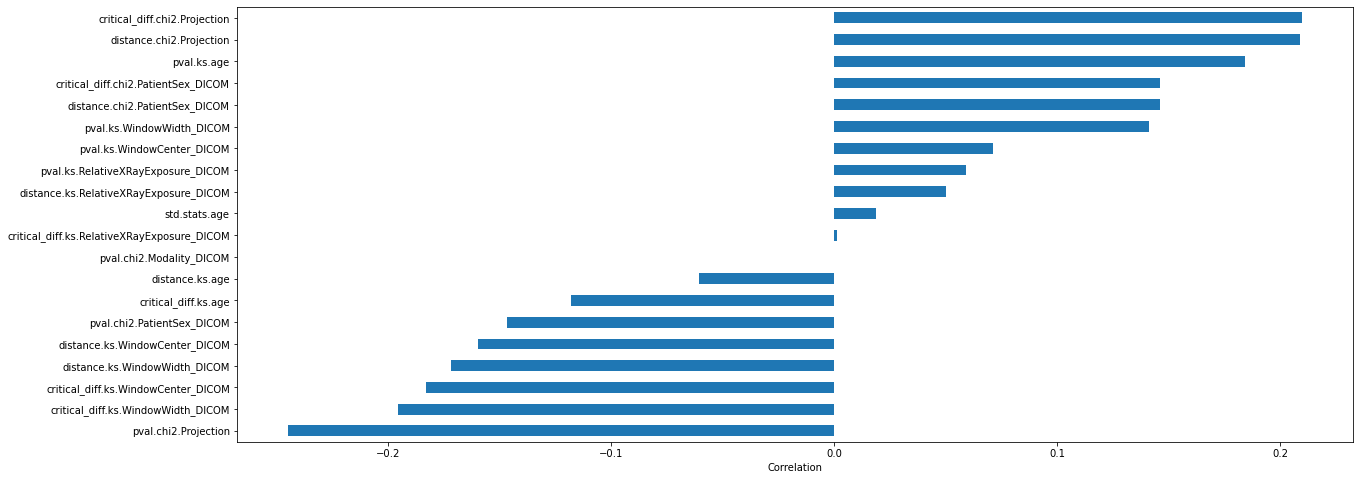

In [112]:
target_col = [c for c in list(output2) if 'auroc' in c][0]
print(target_col)

keep = ['pval', "distance", 'diff', 'stat']
corr_cols = [c for c in list(output2) if target_col not in c and any(k in c for k in keep)]
print(corr_cols)
ax = output2[corr_cols].apply(pd.np.tanh).corrwith(output2[target_col]).dropna().sort_values().plot(kind='barh', figsize=(20, 8))

ax.set_xlabel('Correlation')
plt.show()

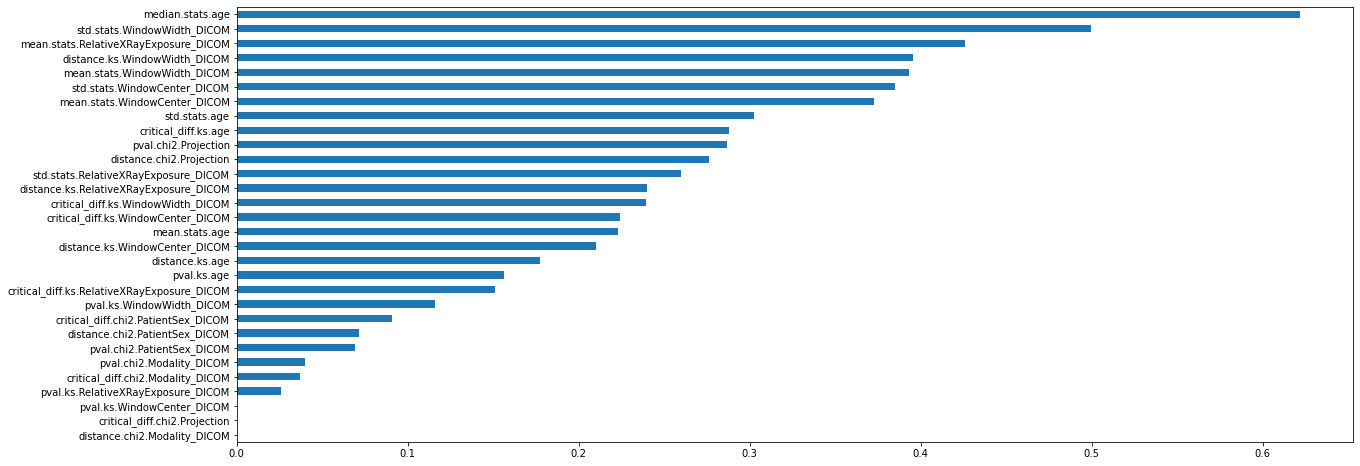

In [113]:
from sklearn.feature_selection import mutual_info_classif

X = output2[corr_cols].dropna(axis=1)
Y = output2[target_col]
Yb = pd.np.digitize(Y, bins=[0.7, .8, 0.9,  .95])
info = mutual_info_classif(X, Yb)

info_gain = dict(zip(list(X), info))
fig, ax = plt.subplots()
pd.Series(info_gain).sort_values().plot(kind='barh',  figsize=(20, 8))

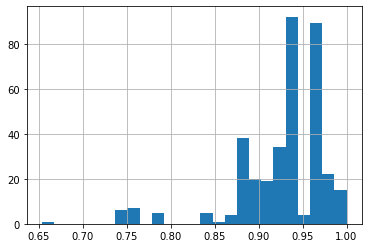

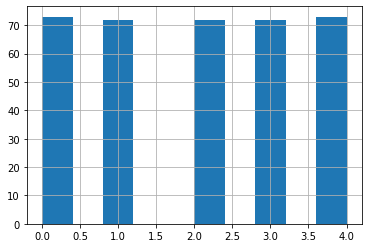

In [83]:
out = pd.qcut(X['ks.critical_diff.RelativeXRayExposure_DICOM'], 5)


out.cat.codes.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021613FAD588>]],
      dtype=object)

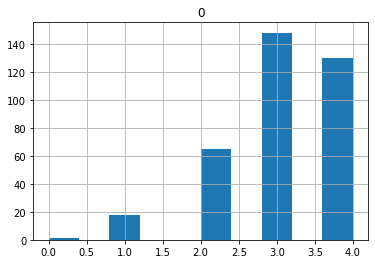

In [69]:
pd.DataFrame(pd.np.digitize(Y, bins=[0.7, .8, 0.9,  .95])).hist()

In [ ]:
output2[target_col].hist(bins=25)


In [ ]:
graph_view = output.swaplevel(0,-1, axis=1, ).sort_index(axis=1)
graph_view.head()
graph_view['mean']

In [ ]:
output2 = output.copy()
output2.columns = ['.'.join(c).strip('.') for c in output2.columns.to_flat_index()]
output2.head()

In [ ]:
import random
import tqdm
from model_drift.data.utils import nested2series

def random_sample_apply(dataframe, func, nsamples=100, sample_size_min=500, sample_size_max=500):

    sample_size_min = max(sample_size_min, 1)

    if not isinstance(dataframe.index, pd.DatetimeIndex):
        raise ValueError()

    def _apply(sample_size):
        x = dataframe.sample(sample_size)
        preds = func(x)
        preds["count"] = len(x)
        return nested2series(preds)

    out = {}
    for i in tqdm.trange(nsamples):
        out[i] = _apply(random.randint(sample_size_min, sample_size_max))
    return pd.concat(out, axis=0).unstack(level=0).T

In [ ]:
output = random_sample_apply(val.df, dwc.predict, nsamples=1000, sample_size_max=2000)

In [ ]:
graph_view = output.swaplevel(0,-1, axis=1, ).sort_index(axis=1)
graph_view.head()

In [ ]:
output2 = output.copy()
output2.columns = ['.'.join(c) for c in output2.columns.to_flat_index()]
output2.head()

In [ ]:
target_col = "score.label.auroc"
corr_cols = [c for c in list(output2) if target_col not in c]

corr_cols
ax = output2[corr_cols].corrwith(output2[target_col]).dropna().abs().sort_values().plot(kind='barh', figsize=(20, 8))

ax.set_xlabel('Abs Correlation')

In [ ]:
val.df['age'].hist()

In [ ]:
graph_view = output.swaplevel(0,-1, axis=1, ).sort_index(axis=1)
graph_view.head()

In [ ]:
graph_view['critical_diff']['ks'].plot()

In [ ]:
score_cols = [f"activation.{c}" for c in label_cols]

In [ ]:
label_cols

In [ ]:

score_cols

In [ ]:
import torch
from torchmetrics import AUROC
from torchmetrics.functional import auroc
# auroc?

score_cols = sorted([c for c in list(df) if c.startswith('activation.')])
lbl_cols = sorted([c for c in list(df) if c.startswith('label.')])

def get_auc(sample):
    out = {}
    for c in label_cols:
        s = f"activation.{c}"
        l = c
    # for l, s in zip(lbl_cols, score_cols):
    #     c = l.split('.')[-1]
        try:
            val = auroc(torch.tensor(sample[s].values), torch.tensor(sample[l].values).long()).numpy()
        except Exception as e:
            if "No positive samples in targets" not in str(e):
                raise
            val = float('NaN')
        out[f'auroc.{c}'] = val
    out = pd.Series(out)
    out["auroc.mean"] = out.mean()
    return out


In [ ]:
list(test.df)

In [ ]:
from model_drift.data.utils import rolling_window_dt_apply

In [ ]:
auroc_df = rolling_window_dt_apply(test.df, get_auc, min_periods=500)

In [ ]:
auroc_df

In [ ]:
auroc_df

In [ ]:
auc_cols = [f"auroc.{c}" for c in label_cols]
auc_cols

In [ ]:
for c in auc_cols:
    auroc_df[c] = pd.to_numeric(auroc_df[c], errors='coerce')

auroc_df[auc_cols].astype(float).plot(figsize=(25,8))

In [ ]:
fdf = pc.df.query("Frontal").set_index("StudyDate")
# fdf = pc.df.set_index("StudyDate")
print(len(fdf), len(pc.df))
auroc_df_all = rolling_window_dt_apply(fdf, get_auc, min_periods=500)

In [ ]:
split_dates = pd.to_datetime(settings.PADCHEST_SPLIT_DATES)

p = auroc_df_all[auc_cols].astype(float).mean(axis=1)
ax = p.rolling(1).mean().plot(figsize=(25, 8), label='raw')
roll=30*4
ax = p.rolling(roll).mean().plot(figsize=(25, 8), label='smoothed', ax=ax)


yy = [p.min(), p.max()]
ax.plot([split_dates[0], split_dates[0]], yy, ':k', alpha=.3)
ax.plot([split_dates[1], split_dates[1]], yy, ':k', alpha=.3)

y = yy[0]
ax.text(pd.to_datetime('2011-01-1'), y, "Train", size=25)
ax.text(pd.to_datetime('2013-05-1'), y, "Val", size=25)
ax.text(pd.to_datetime('2016-01-1'), y, "Test", size=25)

# split_dates = pd.to_datetime(['2012-01-01', ' 2013-01-01'])
# ax.plot([split_dates[0], split_dates[0]], [.75, .90], ':r')
# ax.plot([split_dates[1], split_dates[1]], [.75, .90], ':r')

ax.legend()

In [ ]:
# def average_age(x):
m = rolling_window_dt_apply(pc.df, lambda x: {'age': x['age'].mean()}, min_periods=500)


In [ ]:
ax = m[['age']].astype(float).mean(axis=1).rolling(1).mean().plot(figsize=(25, 8), label='raw')
roll=30*4
ax = m[['age']].astype(float).mean(axis=1).rolling(roll).mean().plot(figsize=(25, 8), label='smoothed', ax=ax)

split_dates = pd.to_datetime(settings.PADCHEST_SPLIT_DATES)
ax.plot([split_dates[0], split_dates[0]], [40, 70], ':k', alpha=.3)
ax.plot([split_dates[1], split_dates[1]], [40, 70], ':k', alpha=.3)

y = 45
ax.text(pd.to_datetime('2011-01-1'), y, "Train", size=25)
ax.text(pd.to_datetime('2013-05-1'), y, "Val", size=25)
ax.text(pd.to_datetime('2016-01-1'), y, "Test", size=25)

split_dates = pd.to_datetime(['2012-01-01', ' 2013-01-01'])
ax.plot([split_dates[0], split_dates[0]], [40, 70], ':r')
ax.plot([split_dates[1], split_dates[1]], [40, 70], ':r')

ax.legend()

In [ ]:
df1 = pc.df.query('Frontal')

len(df1)

In [ ]:
df1[df1['No Finding']==0][label_cols].sum()

In [ ]:
df = pd.concat([pd.read_csv("../../data/padchest_10labels_trainval.csv"), pd.read_csv("../../data/padchest_10labels_test.csv")])

len(df)

In [ ]:
df[label_cols].sum()

In [ ]:
df3 = df1.merge(df, on="ImageID", how='inner')

In [ ]:
lx = [l+"_x" for l in label_cols]
ly= [l+"_y" for l in label_cols]

In [ ]:
import itertools

x = list(itertools.chain(*zip(lx, ly)))
x

In [ ]:
df3[x]
(df3[lx].values != df3[ly].values).sum(axis=0)